<a href="https://colab.research.google.com/github/CLAUDERNORONHA/ABERTO/blob/master/Polui%C3%A7%C3%A3o_Atmosfera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você pode ter visto artigos de notícias recentes afirmando que a qualidade do ar melhorou devido ao COVID-19.

Isso é verdade para alguns locais, mas como sempre a verdade é um pouco mais complicada. **Em partes de muitas cidades, a qualidade do ar parece piorar à medida que mais pessoas ficam em casa. **

Para este desafio, vamos nos aprofundar nos dados, encontrando **maneiras de rastrear a qualidade do ar** e como ela está mudando, mesmo em lugares sem sensores baseados no solo(ground-based sensors). 

Esta informação será especialmente útil em face da crise atual, **uma vez que a má qualidade do ar torna uma doença respiratória como a COVID-19 mais perigosa**.

**Coletamos dados meteorológicos e observações diárias do satélite Sentinel 5P** rastreando vários poluentes na atmosfera. 

Um dos grandes objetivos dos Cientistas de Dados é usar essas informações para prever a concentração de partículas PM2.5 (uma medida comum da qualidade do ar que normalmente requer sensores baseados no solo para medir) todos os dias para cada cidade, nos últimos três meses, abrangendo centenas de cidades em todo o mundo.

#Fonte de dados
https://bit.ly/2Xasezb

O conjunto de dados consiste em determinados parâmetros, como umidade, velocidade e direção do vento, temperatura, visibilidade e muito mais em uma data específica em um horário mencionado.

Os benefícios de praticar este problema usando técnicas de aprendizado de máquina são os seguintes:

Este desafio o incentivará a aplicar suas habilidades de aprendizado de máquina para construir modelos que possam prever o índice de poluição do ar com base em dados históricos do clima
Este desafio o ajudará a aprimorar seu conhecimento sobre regressão baseada em séries temporais. A regressão é um dos blocos de construção básicos do aprendizado de máquina
Desafiamos você a construir um modelo que preveja o índice de poluição do ar em um dia específico no futuro.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder


In [2]:
test  = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/ESTUDO DE CASO/Poluição atmosfera/test.csv')
train = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/ESTUDO DE CASO/Poluição atmosfera/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  air_pollution_index  33750 non-null  int64  
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            14454 non-null  object 
 1   is_holiday           14454 non-null  object 
 2   humidity             14454 non-null  int64  
 3   wind_speed           14454 non-null  int64  
 4   wind_direction       14454 non-null  int64  
 5   visibility_in_miles  14454 non-null  int64  
 6   dew_point            14454 non-null  int64  
 7   temperature          14454 non-null  float64
 8   rain_p_h             14454 non-null  float64
 9   snow_p_h             14454 non-null  int64  
 10  clouds_all           14454 non-null  int64  
 11  weather_type         14454 non-null  object 
 12  traffic_volume       14454 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.4+ MB


In [5]:
train.head(100)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,None,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,None,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,None,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,None,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,None,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2012-10-06 15:00:00,None,70,5,240,5,5,280.00,0.0,0.0,75,Clouds,149,5153
96,2012-10-06 16:00:00,None,70,9,240,5,5,279.06,0.0,0.0,90,Clouds,77,5024
97,2012-10-06 17:00:00,None,70,8,250,1,1,278.91,0.0,0.0,90,Clouds,77,4779
98,2012-10-06 18:00:00,None,70,7,250,1,1,278.39,0.0,0.0,90,Clouds,178,4362


In [6]:
train.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


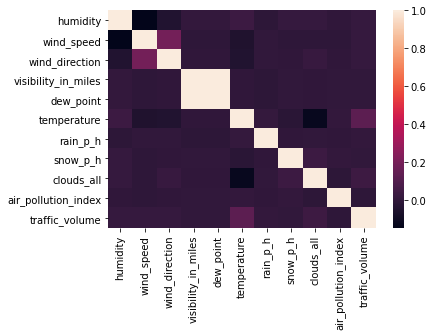

In [12]:
#Matriz de correlação 
sns.heatmap(train.corr());

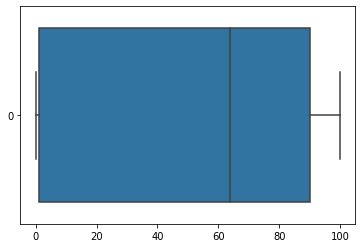

In [10]:
sns.boxplot(data = train['clouds_all'], orient = 'h');  

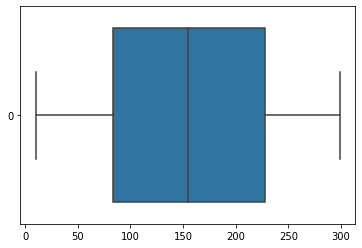

In [14]:
#Indice de poluição do AR

sns.boxplot(data = train['air_pollution_index'], orient='h');

In [15]:
train.describe()

,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


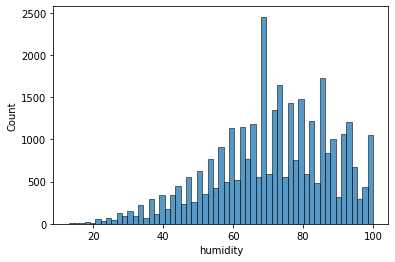

In [18]:
#Distribuição dos dados 
sns.histplot(train.humidity);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


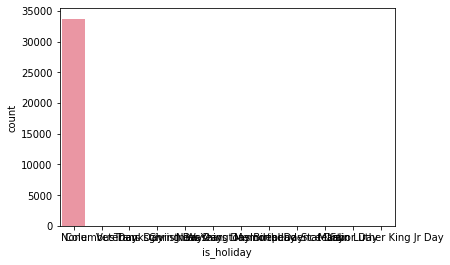

In [20]:
#Tipos de feriados

sns.countplot(train.is_holiday);

Coomo o grafico não ficou legal, é preferivel criar uma nova formad e visualização 

In [21]:
train.is_holiday.value_counts()

None                         33707
Thanksgiving Day                 5
New Years Day                    5
Christmas Day                    5
Veterans Day                     4
Columbus Day                     4
Labor Day                        4
Washingtons Birthday             4
Independence Day                 3
Memorial Day                     3
Martin Luther King Jr Day        3
State Fair                       3
Name: is_holiday, dtype: int64

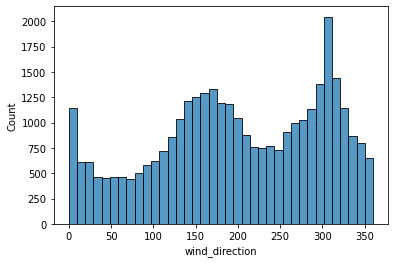

In [23]:
#Velocidade do vento
sns.histplot(train.wind_direction);

PROCESSAMENTO DE DADOS

In [24]:
#Se a divisão for igual a 1 temos a igualdade da duas variaveis, uma delas tem que ser eliminada
train['visibility_in_miles_&_dew_point']=train['visibility_in_miles'] / train['dew_point'] 

In [25]:
train['visibility_in_miles_&_dew_point'].nunique()

1

In [28]:
#Eliminiar as variaveis

#del train['visibility_in_miles_&_dew_point']
#del test['visibility_in_miles_&_dew_point']
#del train['visibility_in_miles']
#del test['visibility_in_miles']

In [29]:
train['hum_ratio_temp']=train['temperature']/train['humidity']
test['hum_ratio_temp']=test['temperature']/test['humidity']

In [31]:
#Ver se tem algum valor nulo
train.isnull().sum(), test.isnull().sum()

(date_time              0
 is_holiday             0
 humidity               0
 wind_speed             0
 wind_direction         0
 visibility_in_miles    0
 dew_point              0
 temperature            0
 rain_p_h               0
 snow_p_h               0
 clouds_all             0
 weather_type           0
 air_pollution_index    0
 traffic_volume         0
 hum_ratio_temp         0
 dtype: int64, date_time              0
 is_holiday             0
 humidity               0
 wind_speed             0
 wind_direction         0
 visibility_in_miles    0
 dew_point              0
 temperature            0
 rain_p_h               0
 snow_p_h               0
 clouds_all             0
 weather_type           0
 traffic_volume         0
 hum_ratio_temp         0
 dtype: int64)

In [33]:
#Conversão da temperatura

train['temperature'] = train['temperature'] - 273.15
test['temperature'] = test['temperature']- 273.15

FAZENDO O LABEL ENCONDER(Convertendo texto em números)

In [34]:
loc  = np.append(train['is_holiday'].values, test['is_holiday'].values, axis=0)

In [36]:
l=LabelEncoder()
l.fit(list(set(loc)))
train['is_holiday']=l.transform(train['is_holiday'])
test['is_holiday']=l.transform(test['is_holiday'])

In [37]:
loc = np.append(train['weather_type'].values, test['weather_type'].values, axis=0)

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['weather_type']=l.transform(train['weather_type'])
test['weather_type']=l.transform(test['weather_type'])

### Transformando variáveis de Data/hora,para criar mais variáveis de Tempo

In [38]:
# Base de Treino
train['date_time'] = pd.to_datetime(train['date_time'])
train['year'] = train['date_time'].dt.year
train['day'] = train['date_time'].dt.day
train['weekofyear'] = train['date_time'].dt.weekofyear
train['month'] = train['date_time'].dt.month
train['dayofweek'] = train['date_time'].dt.dayofweek
train['weekend'] = (train['date_time'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2021, 9, 11) - df['Timestamp']).dt.days
train['hour'] = train['date_time'].dt.hour
#train['minute'] = train['date_time'].dt.minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [39]:
#Base de Test
test['date_time'] = pd.to_datetime(test['date_time'])
test['year'] = test['date_time'].dt.year
test['day'] = test['date_time'].dt.day
test['weekofyear'] = test['date_time'].dt.weekofyear
test['month'] = test['date_time'].dt.month
test['dayofweek'] = test['date_time'].dt.dayofweek
test['weekend'] = (test['date_time'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2019, 8, 1) - df['Timestamp']).dt.days
test['hour'] = test['date_time'].dt.hour
#test['minute'] = test['date_time'].dt.minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [40]:
# Imprimindo para ver o campo transformado
out1=test['date_time']
out1

0       2017-05-18 00:00:00
1       2017-05-18 00:00:00
2       2017-05-18 00:00:00
3       2017-05-18 01:00:00
4       2017-05-18 01:00:00
                ...        
14449   2018-09-30 19:00:00
14450   2018-09-30 20:00:00
14451   2018-09-30 21:00:00
14452   2018-09-30 22:00:00
14453   2018-09-30 23:00:00
Name: date_time, Length: 14454, dtype: datetime64[ns]

In [41]:
# Ignorando Alertas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
# Deletando variável que não vamos usar
del train['date_time']
del test['date_time']

AMOSTRAGEM DOS DADOS

In [43]:
# Separando variáveis explicativas e o Target
X = train.drop(labels=['air_pollution_index'], axis=1)
y = train['air_pollution_index'].values

# Separando os dados para Treinar e testar
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
# Dando uma olhada na shape das bases
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((25312, 20), (25312,), (8438, 20), (8438,))

CONTRUÇÃO DA MAQUINA PREDITIVA

In [45]:
# Criando uma Máquina Preditiva Regressora, pois iremos prever um valor que é um índice de poluição
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=100, learning_rate=0.1, n_estimators=100, random_state=101)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)

      Iter       Train Loss   Remaining Time 
         1        6983.0829            6.29s
         2        6980.4103            6.26s
         3        6977.9502            6.22s
         4        6976.2866            6.12s
         5        6974.8857            6.03s
         6        6972.1712            5.93s
         7        6969.6306            5.84s
         8        6967.3294            5.75s
         9        6965.8516            5.68s
        10        6963.6689            5.63s
        11        6961.5845            5.55s
        12        6959.4784            5.49s
        13        6957.3059            5.41s
        14        6955.2651            5.36s
        15        6952.3196            5.29s
        16        6950.6823            5.23s
        17        6948.6175            5.16s
        18        6946.3937            5.09s
        19        6944.5229            5.03s
        20        6941.7092            4.97s
        21        6940.6021            4.90s
        2

AVALIAÇÃO DA MAQUINA PREDITIVA

In [46]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [47]:
print('score', 100-sqrt(mean_absolute_error(y_cv, y_pred)))

score 91.43883968578326


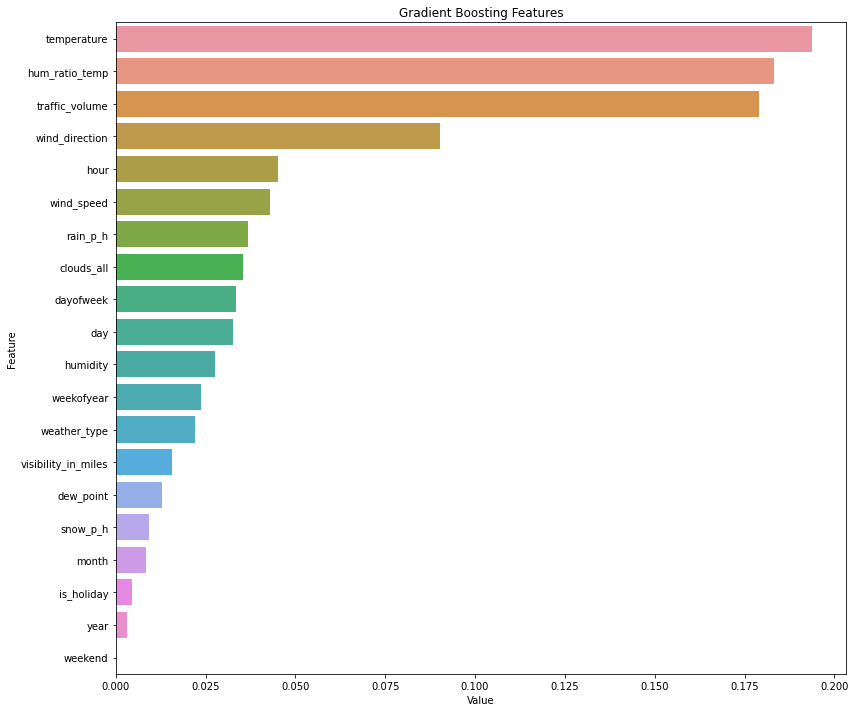

In [48]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()